# SVM Classification Algorithm

# Business Problem Understanding

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,VIRUS
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Med_1_mL  400 non-null    float64
 1   Med_2_mL  400 non-null    float64
 2   VIRUS     400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [16]:
df["VIRUS "].value_counts()

0    200
1    200
Name: VIRUS , dtype: int64

# EDA

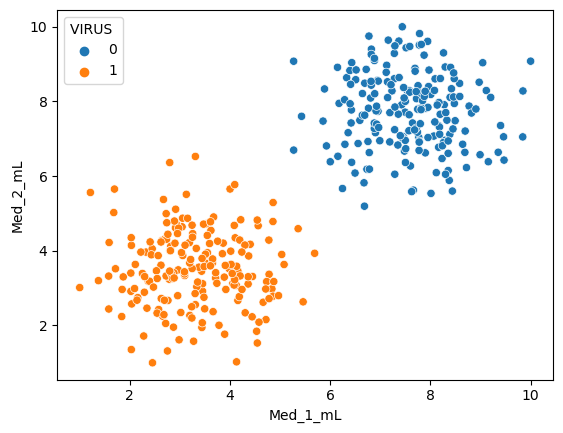

In [19]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='VIRUS ',data=df)
plt.show()

In [20]:
X=df[['Med_1_mL','Med_2_mL']]
y=df['VIRUS ']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=104)

# Support Vector Machine(SVM)

#With Deafult Parameter

In [27]:
#Modelling
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

#Prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train)) #Train accuracy
print(accuracy_score(y_test,ypred_test)) #Train accuracy

1.0
1.0


# Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

grid=GridSearchCV(estimator,param_grid,cv=5)

grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [45]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# Rebuid the SVM model with best parameters

In [42]:
model=SVC(kernel='linear',C=0.01)
model.fit(X_train,y_train)

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

print(accuracy_score(y_train,ypred_train)) #Train Accuracy
print(accuracy_score(y_test,ypred_test)) #Train Accuracy

1.0
1.0
